## Observations and Insights 

*This dataset is slightly more representative of male mice than female mice, with a males making up 50.4% and females making up 49.6%. 

*Capomulin and Ramicane appear to be the most successful treatment regimens. This is implied by lower final tumor volumes, and more total measurements.

*There is a positive correlation between mouse weight and average tumor volume.

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
mice_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice = len(mice_merged_df["Mouse ID"].unique())

total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_merged_df[mice_merged_df.duplicated(['Mouse ID','Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = mice_merged_df[mice_merged_df.duplicated(['Mouse ID','Timepoint'], keep=False)]

duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
mice_clean_df = mice_merged_df.loc[mice_merged_df["Mouse ID"] != "g989", :]

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#mice_merged_df_clean = mice_merged_df.drop_duplicates(subset=['Timepoint', 'Mouse ID'])



mice_clean_df = mice_merged_df.loc[mice_merged_df["Mouse ID"] != "g989", :]
mice_clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(mice_clean_df["Mouse ID"].unique())

total_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_vol = mice_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_vol = mice_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_var = mice_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_std = mice_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_sem = mice_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



# Assemble the resulting series into a single summary dataframe.

stats_summary = {
                "Mean" : mean_tumor_vol,
                "Median" : median_tumor_vol,
                "Variance" : tumor_vol_var,
                "Standard Deviation" : tumor_vol_std,
                "Standard Error of the Mean": tumor_vol_sem 
                
}

stats_summary_df = pd.DataFrame(stats_summary)

stats_summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#define function that returns SEM

def sem(array):
        
    return np.std(array) / np.sqrt(np.size(array))

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats_summary = mice_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([np.mean,np.std, np.median, np.var, sem])

drug_stats_summary

,mean,std,median,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.328629
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.468499
Infubinol,52.884795,6.567243,51.820584,43.128684,0.490851
Ketapril,55.235638,8.279709,53.698743,68.553577,0.602252
Naftisol,54.331565,8.134708,52.509285,66.173479,0.594860
Placebo,54.033581,7.821003,52.288934,61.168083,0.579722
Propriva,52.320930,6.622085,50.446266,43.852013,0.542490
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320250
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.571526


## Bar and Pie Charts

<IPython.core.display.Javascript object>


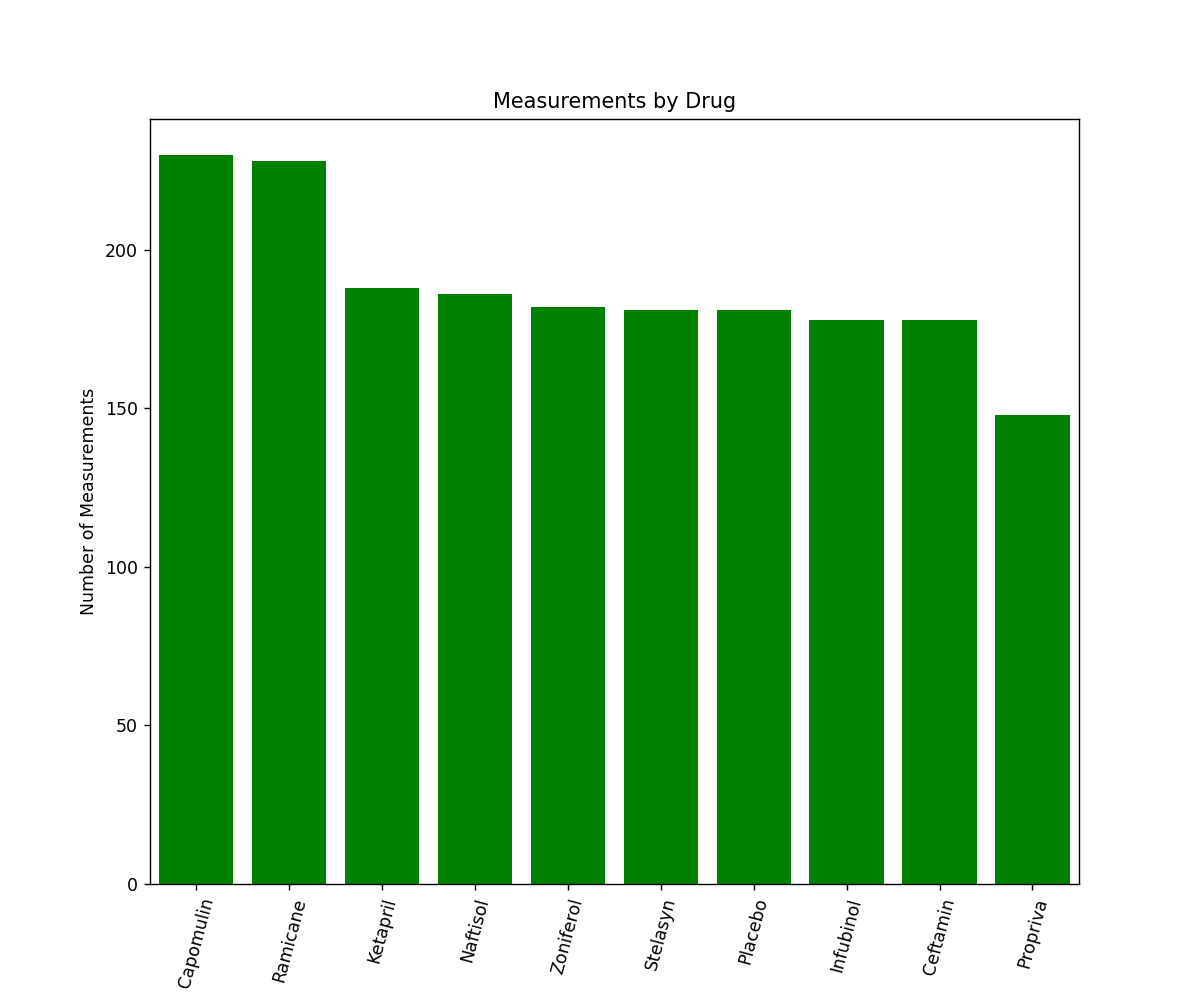

In [36]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


drug_totals = mice_clean_df['Drug Regimen'].value_counts()


drug_totals.plot(kind="bar", facecolor="green")
plt.title("Measurements by Drug")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=75)

plt.show()

<IPython.core.display.Javascript object>


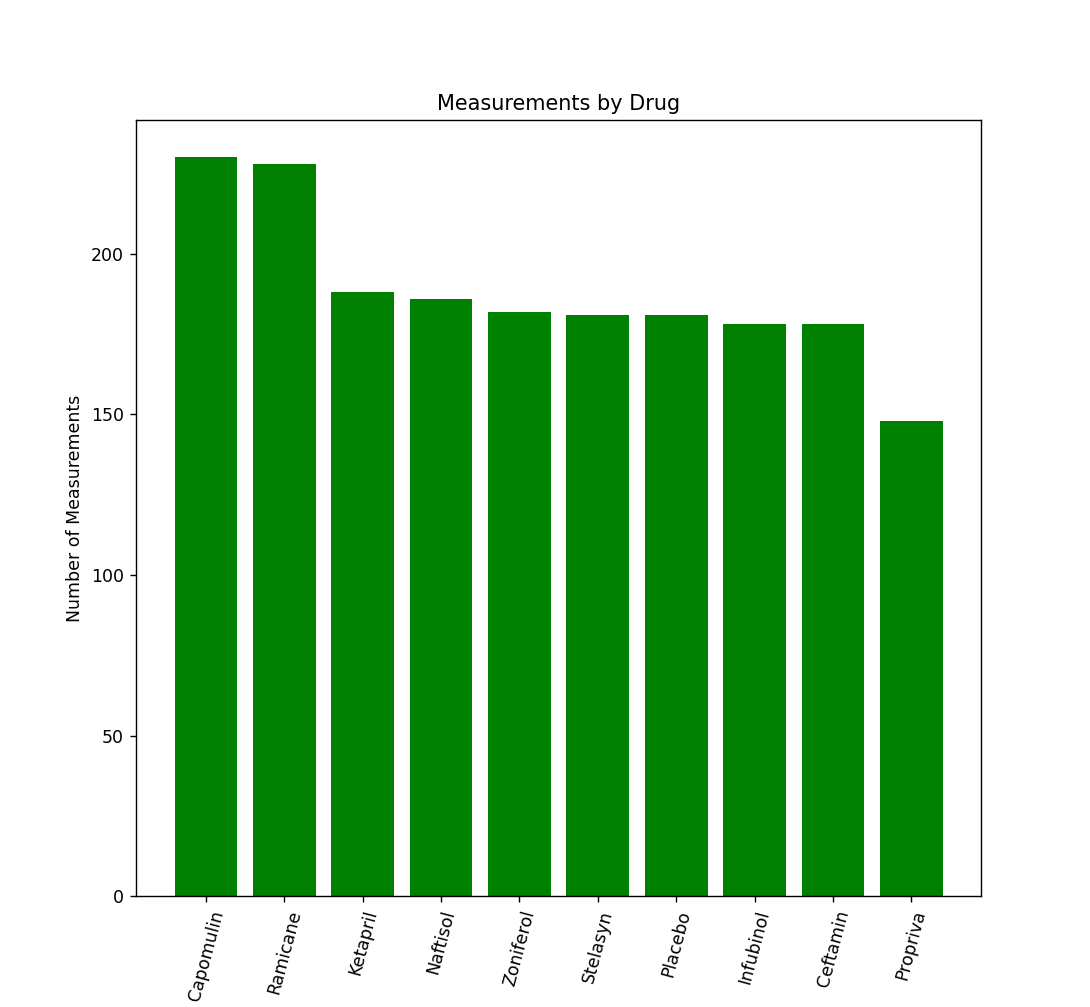

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

DrugNames = ['Capomulin','Ramicane','Ketapril','Naftisol', 'Zoniferol', 'Stelasyn','Placebo','Infubinol','Ceftamin', 'Propriva']
DrugTotals = drug_totals

x_axis = np.arange(len(DrugTotals))

# Create a bar chart based upon the above data
plt.bar(x_axis, DrugTotals, color="g", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, DrugNames, rotation ="vertical")

plt.title("Measurements by Drug")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=75)


In [44]:
#make df for unique sex

mice_sex = mice_clean_df.groupby(['Mouse ID'])['Sex'].unique()

mice_sex_df = pd.DataFrame(mice_sex)

mice_sex_df

,Sex
Mouse ID,
a203,[Female]
a251,[Female]
a262,[Female]
a275,[Female]
a366,[Female]
...,...
z435,[Female]
z578,[Male]
z581,[Female]


<IPython.core.display.Javascript object>


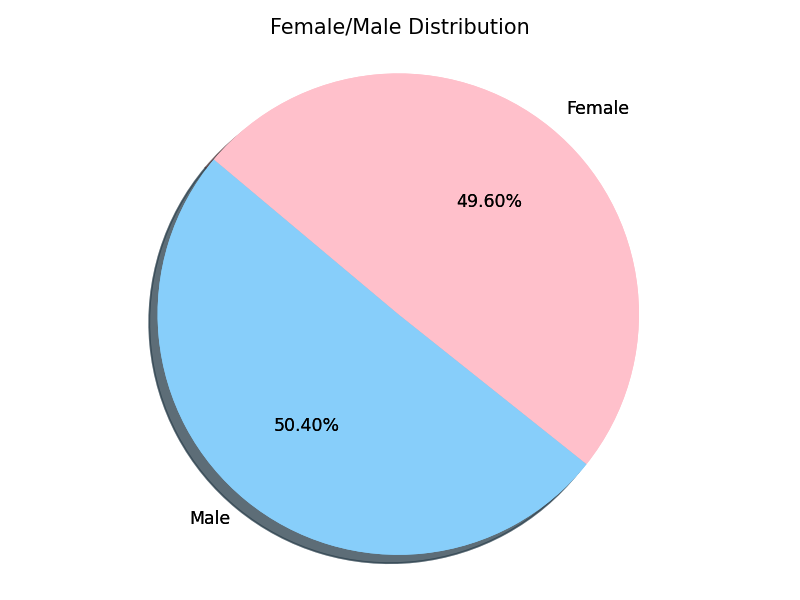

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_totals = mice_sex_df['Sex'].value_counts()

colors = ["lightskyblue", "pink"]
labels = ["Male", "Female"]


sex_totals.plot(kind="pie", title=("Female/Male Distribution"), autopct="%1.2f%%", colors=colors, startangle=140, labels=labels, shadow=True)
plt.axis('off')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


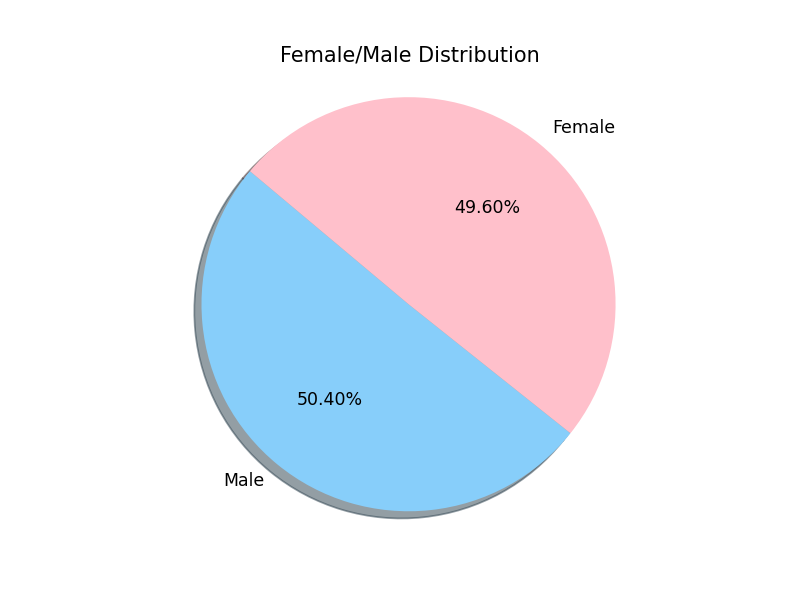

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]
female_count = len(mice_sex_df.loc[mice_sex_df["Sex"] == "Female", :])
male_count = len(mice_sex_df.loc[mice_sex_df["Sex"] == "Male", :])

# The values of each section of the pie chart
sizes = [male_count, female_count]
colors = ["lightskyblue", "pink"]

plt.pie(sizes,labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Female/Male Distribution")
plt.show()



## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#create copy of clean data
clean_copy = pd.DataFrame.copy(mice_clean_df)

#list of 4 regimens
top_four = clean_copy.set_index('Drug Regimen').loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']].reset_index()

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = top_four.groupby('Mouse ID')['Timepoint'].max()

FTV_df = pd.DataFrame(final_tumor_volume).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_last_timepoint = pd.merge(clean_copy, FTV_df, on=["Timepoint", "Mouse ID"])


vol_last_timepoint



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [58]:
#Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []
outliers = []

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#calculate Q1 and Q3

Q1 = np.percentile(vol_last_timepoint['Tumor Volume (mm3)'], 25)
Q3 = np.percentile(vol_last_timepoint['Tumor Volume (mm3)'], 75)

print(f"The first quartile of tumor volume is: {Q1}")
print(f"The third quartile of tumor volume is: {Q3}")

#Interquartile Range (IQR)
IQR = Q3- Q1

print(f"The interquartile range of tumor volume is: {IQR}")

#Find outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#add tumor volumes to list
for vol in vol_last_timepoint['Tumor Volume (mm3)']: 
    tumor_volumes.append(vol)

#Determine outliers using upper and lower bounds

for vol in tumor_volumes:
    if vol < lower_bound:
        outliers.append(vol)
    if vol > upper_bound:
        outliers.append(vol)
        
#no outliers found using this method
print(f"These are potential outliers: {outliers}")

    

The first quartile of tumor volume is: 37.187743802499995
The third quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
These are potential outliers: []


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data 
FTV = []

#use for loop to append FTV to list    
for vol in vol_last_timepoint:
    capomulin_vl = vol_last_timepoint[vol_last_timepoint['Drug Regimen'] =='Capomulin' ]['Tumor Volume (mm3)']
    ramicane_vl = vol_last_timepoint[vol_last_timepoint['Drug Regimen'] =='Ramicane' ]['Tumor Volume (mm3)']
    infubinol_vl = vol_last_timepoint[vol_last_timepoint['Drug Regimen'] =='Infubinol' ]['Tumor Volume (mm3)']
    ceftamin_vl = vol_last_timepoint[vol_last_timepoint['Drug Regimen'] =='Ceftamin' ]['Tumor Volume (mm3)']

FTV.append(capomulin_vl)
FTV.append(ramicane_vl)
FTV.append(infubinol_vl)
FTV.append(ceftamin_vl)


<IPython.core.display.Javascript object>


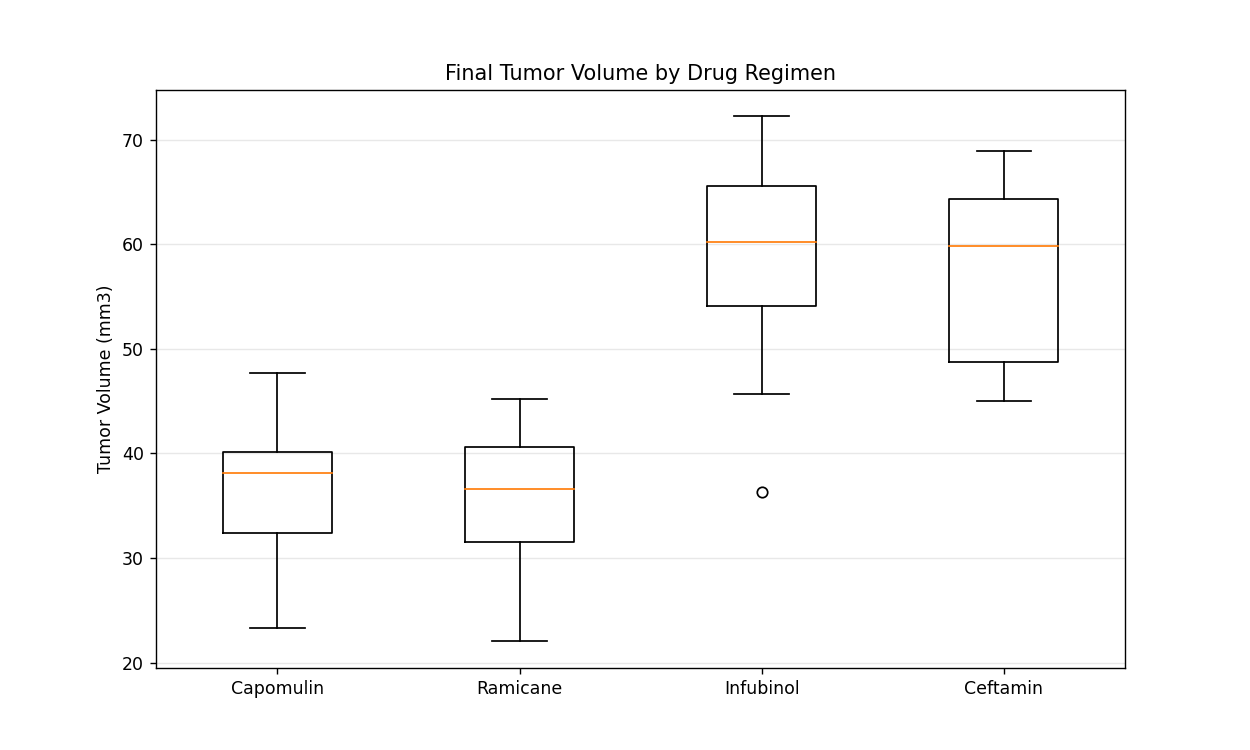

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.boxplot(FTV)
plt.xticks([1, 2, 3, 4], drug_list)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)



In [61]:
#find value of outlier in Infubinol
Infubinol_df = vol_last_timepoint[vol_last_timepoint['Drug Regimen'] =='Infubinol' ]

#Find IQR for Infubinol
IQ1 = np.percentile(Infubinol_df['Tumor Volume (mm3)'], 25)
IQ3 = np.percentile(Infubinol_df['Tumor Volume (mm3)'], 75)


iqr_inf = st.iqr(Infubinol_df['Tumor Volume (mm3)'])

#Find lower and upper bounds
lower_Inf = IQ1 - (1.5 * iqr_inf)
upper_Inf = IQ3 + (1.5 * iqr_inf)

print(f"The lower bound for Infubinol is {lower_Inf}")
print(f"The upper bound for Infubinol is {upper_Inf}")

Infubinol_outliers = []

for vol in Infubinol_df['Tumor Volume (mm3)']:
    if vol < lower_Inf:
       Infubinol_outliers.append(vol)
    if vol > upper_Inf:
        Infubinol_outliers.append(vol)
        
print(f"The outlier from Infubinol has a volume of : {Infubinol_outliers}")
Infubinol_outlier = Infubinol_df[Infubinol_df['Tumor Volume (mm3)'] == Infubinol_outliers[0]]

print("The information for the Infubinol outlier is:")
Infubinol_outlier

The lower bound for Infubinol is 36.83290494999999
The upper bound for Infubinol is 82.74144559000001
The outlier from Infubinol has a volume of : [36.321345799999996]
The information for the Infubinol outlier is:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
58,c326,Infubinol,Female,18,25,5,36.321346,0


## Line and Scatter Plots

<IPython.core.display.Javascript object>


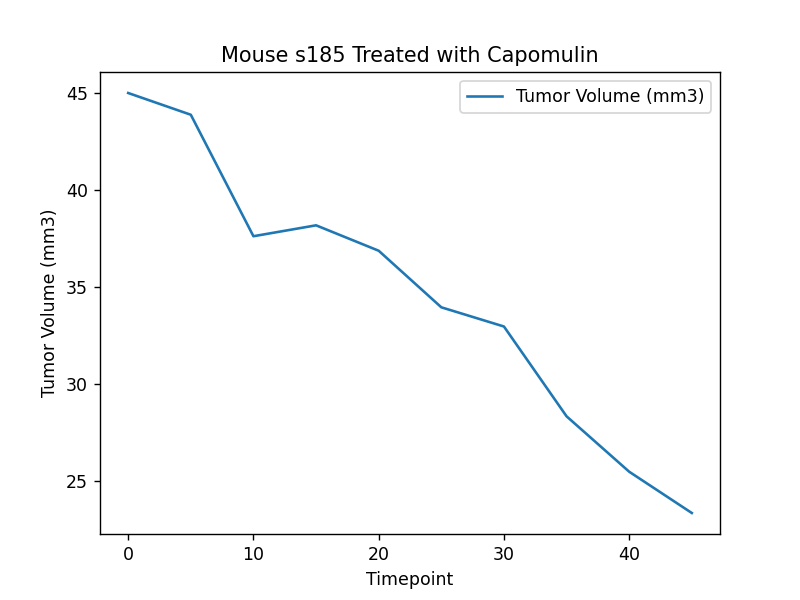

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#make df for capomulin
Capomulin_df = clean_copy[clean_copy['Drug Regimen'] =='Capomulin']


Filtered_Cap_df = Capomulin_df[['Mouse ID','Tumor Volume (mm3)', 'Timepoint']] 

mouse_s185 = Filtered_Cap_df[Filtered_Cap_df['Mouse ID'] =='s185']

s185_graph = mouse_s185.plot.line(x='Timepoint', y='Tumor Volume (mm3)')


plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 Treated with Capomulin")
plt.show()



<IPython.core.display.Javascript object>


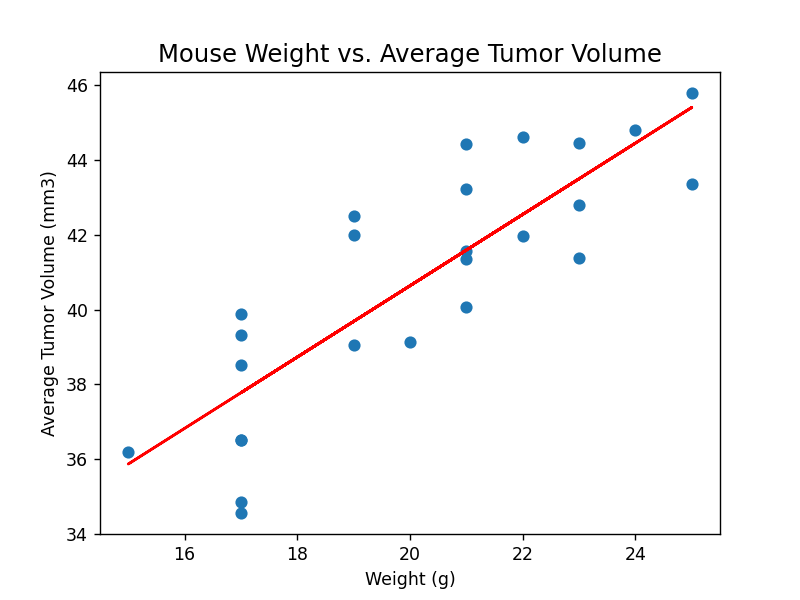

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Find the average tumor volume for every mouse treated with Capomulin
avg_tumor_vol = Capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_mouse_weight = Capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()



atv_df = pd.DataFrame(avg_tumor_vol)
amw_df = pd.DataFrame(avg_mouse_weight)

#merge DFs
avw_df = pd.merge(atv_df, amw_df, on=[ "Mouse ID"])


avw_df.plot(kind='scatter', x='Weight (g)', y= 'Tumor Volume (mm3)' )
plt.show()

avw_df

## Correlation and Regression

In [56]:
#Calculate the correlation coefficient and linear regression model between mouse weight 
#and average tumor volume for the Capomulin treatment

corr=round(st.pearsonr(avw_df['Weight (g)'], avw_df['Tumor Volume (mm3)'])[0],2)

print(f"The correlation between mouse weight and average tumor volume is {corr}")

lin_regress= st.linregress(avw_df['Weight (g)'], avw_df['Tumor Volume (mm3)'])

slope = 0.9544396890241045
intercept = 21.552160532685015

y_values = avw_df['Weight (g)']*slope + intercept

plt.scatter(avw_df['Weight (g)'], avw_df['Tumor Volume (mm3)'])
plt.plot(avw_df['Weight (g)'], y_values, color = "red")

plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse Weight vs. Average Tumor Volume', fontsize= 14)



The correlation between mouse weight and average tumor volume is 0.84


Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume')